Importing packages to be used below...

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc
from skimage import io
from matplotlib import cm            # Importing colormap

**Exercise 1a)** PCA via eigenvalue decomposition to reconstruct images of the number ''7''. We start by implementing PCA using the template.

In [3]:
# Loading the two datasets to be used
ones = np.loadtxt('data/MNISTones.txt', delimiter=',')
sevens = np.loadtxt('data/MNISTsevens.txt', delimiter=',')

In [4]:
# input: datamatrix as loaded by numpy.loadtxt('MNISTones.txt', delimiter=',')
# output: a tuple consisting of: 1) the eigenvalues in a vector 
#                                2) the unit eigenvectors in a matrix with each column being an eigenvector
def pca(data):
    # Extract data dimensions
    d, N = data.shape
    # First, center the data
    center = np.mean(data, 1)
    centers = np.matlib.repmat(center, N, 1)
    data_cent = data - np.transpose(centers)
    
    # Compute covariance and its eigenvalues from centered data
    Sigma = np.cov(data_cent)
    evals, evecs = np.linalg.eigh(Sigma)
    evals = evals[::-1]
    evecs = np.fliplr(evecs)
    
    # Return eigenvalues and eigenvectors
    return evals, evecs

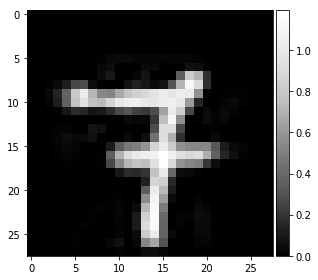

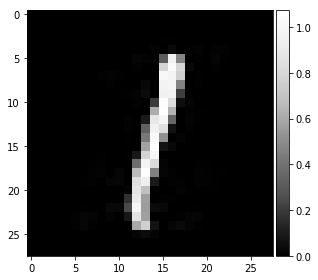

In [5]:
def pcarecon(image, data, num_comp):
    # Extract data dimensions
    d, N = data.shape
    # Compute the dataset mean for reconstruction
    center = np.mean(data, 1)
    
    # Perform PCA on centered data
    evals, evecs = pca(data)
    
    # Select eigenvectors for reconstruction
    recon_evecs = evecs[:, np.arange(num_comp)]
    
    # Center the image to be reconstructed
    image_centered = image - center
    
    # Reconstruct the centered image by projecting onto subspace
    proj_coords = np.dot(image_centered, recon_evecs)
    recon = np.dot(np.transpose(proj_coords), np.transpose(recon_evecs))
    
    # Add the center back
    orig_coord_recon = center + recon
    return np.real(orig_coord_recon)

def vec2imarray(mnistvec):
    return np.transpose(np.reshape(mnistvec, [28, 28]))

k = 100 # number of components used for reconstruction
index = 9 # which image
plt.figure()
r = pcarecon(sevens[:,index], sevens, k)
io.imshow(vec2imarray(r), cmap=cm.Greys_r, vmin=0)
# Change the k and index to vary the number of PCs and the image index

plt.figure()
r = pcarecon(ones[:,index], ones, k)
io.imshow(vec2imarray(r), cmap=cm.Greys_r, vmin=0)
# Change the k and index to vary the number of PCs and the image index

**Exercise 4a)** First, we perform morphological opening and compare the vessels before and after opening.

/home/aasa/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


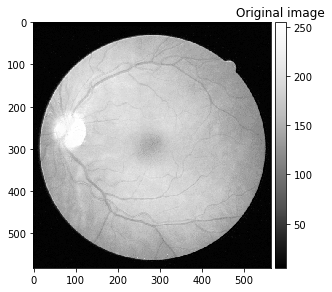

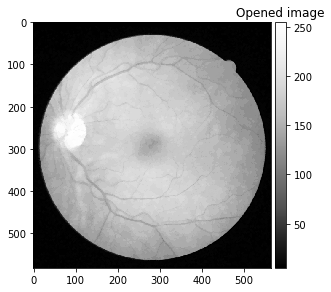

In [6]:
# Loading additional packages
from skimage.morphology import opening
from skimage.morphology import disk

# Loading image
Iret = io.imread('data/01_retinal.png')
Iret = Iret.astype(float)

# Visualizing original image
plt.figure()
io.imshow(Iret, cmap=cm.Greys_r)
plt.title('Original image')

# Defining structure element, performing opening and visualizing result, compared with original image
plt.figure()
selem = disk(2)
I2_opened = opening(Iret, selem)
io.imshow(I2_opened, cmap=cm.Greys_r)
plt.title('Opened image')

**b)** Applying a $3 \times 3$ mean filter

/home/aasa/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


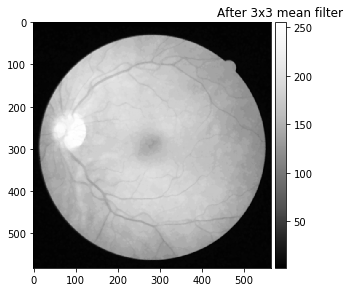

In [7]:
# Importing additional library
from scipy import signal as sg

# Defining the convolution element for the mean filter
gmean3 = np.ones((3,3))/9

# Performing the convolution, and visualizing result
I3_mean = sg.convolve(I2_opened, gmean3, 'same')
plt.figure()
io.imshow(I3_mean, cmap=cm.Greys_r)
plt.title('After 3x3 mean filter')

**4c)** Applying a $9 \times 9$ Gaussian filter

/home/aasa/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


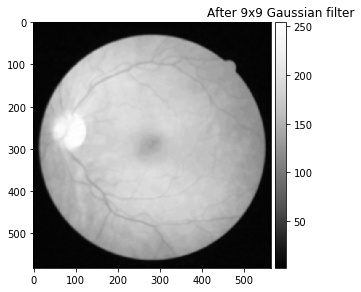

In [8]:
# Importing function for defining Gaussian filter
from scipy.ndimage.filters import gaussian_filter

# Defining the convolution element
gaussian = np.zeros((9, 9))
gaussian[4, 4] = 1
gaussian = gaussian_filter(gaussian,1.8)

# Performing the convolution, and visualizing the result
I4_gauss = sg.convolve(I3_mean,gaussian,'same')
plt.figure()
io.imshow(I4_gauss, cmap=cm.Greys_r)
plt.title('After 9x9 Gaussian filter')

**Exercise 4d)** Applying a $69 \times 69$ mean filter

/home/aasa/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


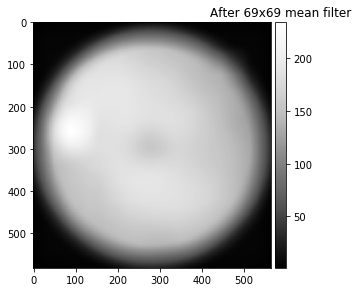

In [9]:
# Define convolution element
gmean69 = np.ones((69,69))/(69*69)

# Perform convolution and visualize result
I5_background = sg.convolve(I4_gauss,gmean69,'same')
plt.figure()
io.imshow(I5_background, cmap=cm.Greys_r)
plt.title('After 69x69 mean filter')

**Exercise 4e)** Perform background removal

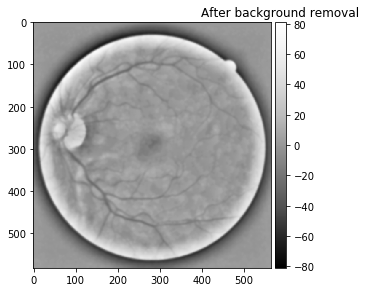

In [10]:
I6_removed_background = I4_gauss - I5_background
plt.figure()
io.imshow(I6_removed_background, cmap=cm.Greys_r)
plt.title('After background removal')

**Exercise 4f)** Linear transformation

a:  -64.9246607576
b:  80.9795322549
a:  0.0
b:  255.0


/home/aasa/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


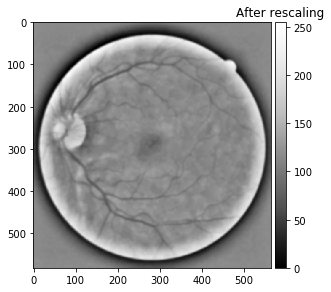

In [11]:
a = np.min(I6_removed_background) # minimum value
b = np.max(I6_removed_background) # maximum value
print('a: ', a)
print('b: ', b)
# Print the values

# Rescale the image and re-print the minimum and maximum value as a check
I7_scaled = (I6_removed_background - a) * 255./(b-a)
a = np.min(I7_scaled)
b = np.max(I7_scaled)
print('a: ', a)
print('b: ', b)
#Yes, it works

# Visualize the transformed image
plt.figure()
io.imshow(I7_scaled, cmap=cm.Greys_r)
plt.title('After rescaling')

**Exercise 4g)** Apply the thresholding from Assignment 1

/home/aasa/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


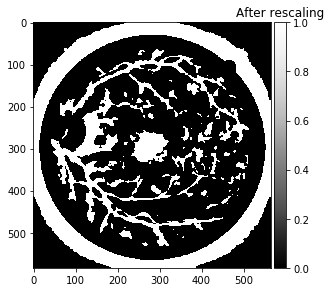

In [12]:
# The thresholding function
def threshold_image(I,t):
    I_th = np.less_equal(I, t)
    I_th = I_th.astype(int)
    
    return I_th

# Apply threshold and visualize result
I8_thresholded = threshold_image(I7_scaled, 110) # vary the threshold
plt.figure()
io.imshow(I8_thresholded, cmap=cm.Greys_r)
plt.title('After rescaling')

**Exercise 4 h-i)** Handling the boundary problem

/home/aasa/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


a:  -39.176974986
b:  50.520166735
a:  0.0
b:  255.0


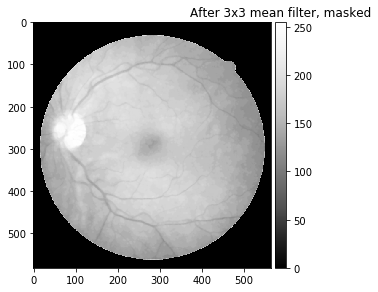

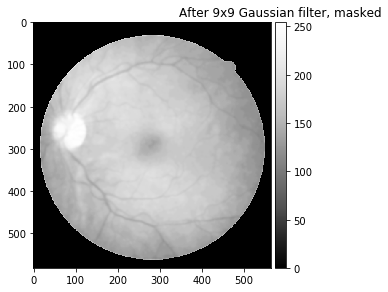

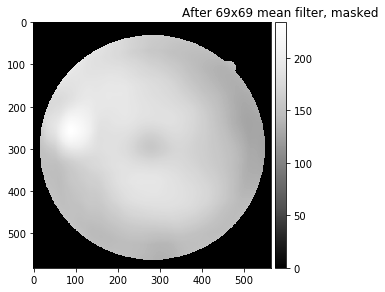

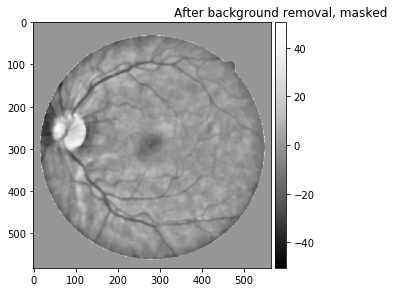

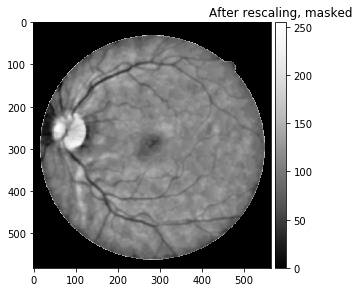

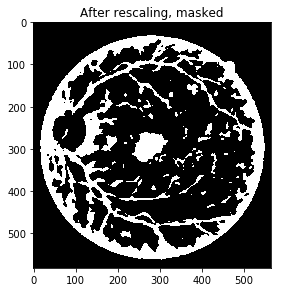

In [13]:
# Input parameter
first_mean_filter_size = 3 # paper value: 3
second_mean_filter_size = 69 # paper value: 69


# Loading mask
mask = io.imread('data/01_test_mask.png')
mask = (mask/255).astype(float)

# 3x3 mean filter, masked
mask3_mean = sg.convolve(mask, gmean3, 'same')
# Add ones outside the mask so we can divide by the mask
mask3_mean_nozeros = mask3_mean + (1-mask) 
I3_mean_masked = I3_mean/mask3_mean_nozeros
# Setting everything outside mask to 0
I3_mean_masked = np.multiply(I3_mean_masked, mask) 
# Visualizing result
plt.figure()
io.imshow(I3_mean_masked, cmap=cm.Greys_r)
plt.title('After 3x3 mean filter, masked')

#9x9 Gauss filter, masked
mask4_gauss = sg.convolve(mask,gaussian,'same')
mask4_gauss_nozeros = mask4_gauss + (1-mask)
I4_gauss_masked = I4_gauss/mask4_gauss_nozeros
# Setting everything outside mask to 0
I4_gauss_masked = np.multiply(I4_gauss_masked, mask) 
# Visualizing result
plt.figure()
io.imshow(I4_gauss_masked, cmap=cm.Greys_r)
plt.title('After 9x9 Gaussian filter, masked')

# 69x69 mean filter, masked
mask5_background = sg.convolve(mask4_gauss,gmean69,'same')
mask5_background_nozeros = mask5_background + (1-mask)
I5_background_masked = I5_background/mask5_background_nozeros
# Setting everything outside mask to 0
I5_background_masked = np.multiply(I5_background_masked, mask) 
# Visualizing result
plt.figure()
io.imshow(I5_background_masked, cmap=cm.Greys_r)
plt.title('After 69x69 mean filter, masked')

# Removing background
I6_removed_background_masked = I4_gauss_masked - I5_background_masked
plt.figure()
io.imshow(I6_removed_background_masked, cmap=cm.Greys_r)
plt.title('After background removal, masked')

# Rescaling image
a = np.min(I6_removed_background_masked) # minimum value
b = np.max(I6_removed_background_masked) # maximum value
print('a: ', a)
print('b: ', b)
# Print the values

# Rescale the image and re-print the minimum and maximum value as a check
I7_scaled_masked = (I6_removed_background_masked - a) * 255./(b-a)
# Setting everything outside mask to 0
I7_scaled_masked = np.multiply(I7_scaled_masked, mask) 
a = np.min(I7_scaled_masked)
b = np.max(I7_scaled_masked)
print('a: ', a)
print('b: ', b)
#Yes, it works
# Visualize the transformed image
plt.figure()
io.imshow(I7_scaled_masked, cmap=cm.Greys_r)
plt.title('After rescaling, masked')

# Apply threshold and visualize result
I8_thresholded_masked = threshold_image(I7_scaled_masked, 103)
# Setting everything outside mask to 0
I8_thresholded_masked = np.multiply(I8_thresholded_masked, mask) 
plt.figure()
io.imshow(I8_thresholded_masked, cmap=cm.Greys_r)
plt.title('After rescaling, masked')